Take the Lyons housing data set from last week and:

      -build a price predictor in keras

     -increase the model complexity until you have clear overfitting

     -use L1, L2 and dropout to try to reduce overfitting, what method seems to work best for you?

     -develop a "good" model and then use Shap to explain how it arrives at an answer.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [6]:
#load the data, change the file address

infile= "lyon_housing.csv"
lyon=pd.read_csv(infile)

In [7]:
lyon.head()

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839
3,2016-11-18,ancien,appartement,3,67.0,66.3,0.0,1,180900.0,6 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.439058
4,2016-12-16,ancien,appartement,1,28.0,NaN,0.0,1,97000.0,163 AV ROGER SALENGRO,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.515719


## So predict pridict prix with keras[link text](https://)

Do everything similar except use keras when required.

Build the model and is keras and put it aside to clean up the data.

No need to recode everything just copy and paste all code from "Lyons_Housing_Data.ipynb" but change things up where applicable for keras.

#Copying starts

In [8]:
lyon['date_transaction']=pd.to_datetime(lyon['date_transaction'])

In [9]:
lyon['date_transaction'].head()

0   2019-10-31
1   2018-11-26
2   2016-08-04
3   2016-11-18
4   2016-12-16
Name: date_transaction, dtype: datetime64[ns]

In [10]:
lyon['year_transaction']=lyon['date_transaction'].dt.year

In [11]:
lyon['date_construction']=pd.to_datetime(lyon['date_construction'])


In [12]:
lyon['year_construction']=lyon['date_construction'].dt.year.astype(int)

In [13]:
lyon.head()

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete,year_transaction,year_construction
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783,2019,2003
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633,2018,2003
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839,2016,2003
3,2016-11-18,ancien,appartement,3,67.0,66.3,0.0,1,180900.0,6 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.439058,2016,2003
4,2016-12-16,ancien,appartement,1,28.0,NaN,0.0,1,97000.0,163 AV ROGER SALENGRO,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.515719,2016,2003


In [14]:
lyon['anciennete'].describe()

count    40516.000000
mean        21.246938
std          9.397379
min         -3.853563
25%         15.064690
50%         26.571388
75%         28.775403
max         31.494144
Name: anciennete, dtype: float64

In [15]:
temp=pd.cut(lyon.anciennete,bins=[-5,0,5,10,20,30,40],labels=['UnderConstruction','0-5','5-10','10-20','20-30','30+'])

In [16]:
lyon['age']=temp

In [17]:
lyon.head(3)

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,surface_terrain,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete,year_transaction,year_construction,age
0,2019-10-31,ancien,maison,5,100.0,NaN,247.0,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783,2019,2003,10-20
1,2018-11-26,ancien,maison,2,52.0,NaN,156.0,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633,2018,2003,10-20
2,2016-08-04,ancien,appartement,1,28.0,28.2,0.0,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839,2016,2003,10-20


In [18]:
lyon = lyon.drop(labels="surface_terrain", axis=1)

In [19]:
lyon.head(3)

,date_transaction,type_achat,type_bien,nombre_pieces,surface_logement,surface_carrez_logement,nombre_parkings,prix,adresse,commune,latitude,longitude,date_construction,anciennete,year_transaction,year_construction,age
0,2019-10-31,ancien,maison,5,100.0,NaN,0,530000.0,6 PAS DES ANTONINS,Villeurbanne,45.781673,4.879333,2003-06-11 11:38:24,16.387783,2019,2003,10-20
1,2018-11-26,ancien,maison,2,52.0,NaN,0,328550.0,12 RUE DU LUIZET,Villeurbanne,45.783240,4.884683,2003-06-11 11:38:24,15.459633,2018,2003,10-20
2,2016-08-04,ancien,appartement,1,28.0,28.2,1,42500.0,4 RUE DE L ESPOIR,Villeurbanne,45.781488,4.883474,2003-06-11 11:38:24,13.148839,2016,2003,10-20


In [20]:
lyon = lyon.drop(labels="surface_carrez_logement", axis=1)

In [21]:
#going to to impute all strings with the most frequent string
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#Impute catagorical data

# I should keep commune out perhaps as they are all commune, however I will keep it in there because you wanted it
# There is also no nan values in that column but I just need it in the data frame

imp = SimpleImputer(strategy="most_frequent")
StringImpuing= pd.DataFrame(imp.fit_transform(lyon[["type_achat","type_bien","commune","age"]]), columns = ["type_achat","type_bien","commune","age"])

#Impute Continuous Data with the median value

impCont = SimpleImputer(strategy="median")
continuousImputing= pd.DataFrame(impCont.fit_transform(lyon[["nombre_pieces","surface_logement","nombre_parkings"]]), columns = ["nombre_pieces","surface_logement","nombre_parkings"])


In [22]:
StringImpuing.head()

,type_achat,type_bien,commune,age
0,ancien,maison,Villeurbanne,10-20
1,ancien,maison,Villeurbanne,10-20
2,ancien,appartement,Villeurbanne,10-20
3,ancien,appartement,Villeurbanne,10-20
4,ancien,appartement,Villeurbanne,10-20


In [23]:
continuousImputing.head()

,nombre_pieces,surface_logement,nombre_parkings
0,5.0,100.0,0.0
1,2.0,52.0,0.0
2,1.0,28.0,1.0
3,3.0,67.0,1.0
4,1.0,28.0,1.0


In [24]:
# Combine string imouting with year transaaction

CatagoricalVariable = pd.concat([StringImpuing,lyon["year_transaction"]],axis = 1)
CatagoricalVariable["year_transaction"]


0        2019
1        2018
2        2016
3        2016
4        2016
         ... 
40511    2020
40512    2020
40513    2020
40514    2020
40515    2020
Name: year_transaction, Length: 40516, dtype: int64

In [25]:
StringImpuing.head()

,type_achat,type_bien,commune,age
0,ancien,maison,Villeurbanne,10-20
1,ancien,maison,Villeurbanne,10-20
2,ancien,appartement,Villeurbanne,10-20
3,ancien,appartement,Villeurbanne,10-20
4,ancien,appartement,Villeurbanne,10-20


In [26]:
CatagoricalVariable.head()

,type_achat,type_bien,commune,age,year_transaction
0,ancien,maison,Villeurbanne,10-20,2019
1,ancien,maison,Villeurbanne,10-20,2018
2,ancien,appartement,Villeurbanne,10-20,2016
3,ancien,appartement,Villeurbanne,10-20,2016
4,ancien,appartement,Villeurbanne,10-20,2016


#one hot encode the categories

In [27]:
from sklearn.preprocessing import OneHotEncoder

encode_lyon=OneHotEncoder()

encode_lyon_fit1= encode_lyon.fit_transform(lyon[CatagoricalVariable.columns[0]].to_numpy().reshape(-1,1))
df_type_achat=pd.DataFrame(encode_lyon_fit1.toarray(),columns=encode_lyon.categories_[0][:])

encode_lyon_fit2= encode_lyon.fit_transform(lyon[CatagoricalVariable.columns[1]].to_numpy().reshape(-1,1))
df_type_2=pd.DataFrame(encode_lyon_fit2.toarray(),columns=encode_lyon.categories_[0][:])

encode_lyon_fit3= encode_lyon.fit_transform(lyon[CatagoricalVariable.columns[2]].to_numpy().reshape(-1,1))
df_type_3=pd.DataFrame(encode_lyon_fit3.toarray(),columns=encode_lyon.categories_[0][:])

encode_lyon_fit4= encode_lyon.fit_transform(lyon[CatagoricalVariable.columns[3]].to_numpy().reshape(-1,1))
df_type_4=pd.DataFrame(encode_lyon_fit4.toarray(),columns=encode_lyon.categories_[0][:])



encode_lyon_fit5= encode_lyon.fit_transform(lyon[CatagoricalVariable.columns[4]].to_numpy().reshape(-1,1))
stringCon= encode_lyon.categories_[0][:].astype(str)
df_type_5=pd.DataFrame(encode_lyon_fit5.toarray(),columns=encode_lyon.categories_[0][:])

df_type_5.columns=stringCon



In [28]:
# concatenate these one-hot-encoded versions of the categorical variables

df_cats_lyon=pd.concat([df_type_achat,df_type_2,df_type_3,df_type_4,df_type_5], axis=1)
df_cats_lyon.head()

,VEFA,ancien,appartement,maison,Lyon 1er Arrondissement,Lyon 2e Arrondissement,Lyon 3e Arrondissement,Lyon 4e Arrondissement,Lyon 5e Arrondissement,Lyon 6e Arrondissement,...,20-30,30+,5-10,UnderConstruction,2016,2017,2018,2019,2020,2021
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#Standardization

#standard scale the other data


In [29]:
scaler = StandardScaler()

lyons_continuous = scaler.fit_transform(continuousImputing)
lyons_continuous=pd.DataFrame(lyons_continuous,columns=continuousImputing.columns)
lyons_continuous

,nombre_pieces,surface_logement,nombre_parkings
0,1.870396,1.231567,-0.996559
1,-0.671310,-0.469113,-0.996559
2,-1.518546,-1.319453,0.666260
3,0.175925,0.062349,0.666260
4,-1.518546,-1.319453,0.666260
...,...,...,...
40511,-0.671310,-1.106868,0.666260
40512,-0.671310,-1.142299,-0.996559
40513,-0.671310,-1.496607,-0.996559
40514,-0.671310,-1.106868,-0.996559


In [30]:
lyon_housing_final = pd.concat([df_cats_lyon,lyons_continuous],axis=1)

In [31]:
lyon_housing_final


,VEFA,ancien,appartement,maison,Lyon 1er Arrondissement,Lyon 2e Arrondissement,Lyon 3e Arrondissement,Lyon 4e Arrondissement,Lyon 5e Arrondissement,Lyon 6e Arrondissement,...,UnderConstruction,2016,2017,2018,2019,2020,2021,nombre_pieces,surface_logement,nombre_parkings
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.870396,1.231567,-0.996559
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.671310,-0.469113,-0.996559
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.518546,-1.319453,0.666260
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.175925,0.062349,0.666260
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.518546,-1.319453,0.666260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40511,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.671310,-1.106868,0.666260
40512,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.671310,-1.142299,-0.996559
40513,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.671310,-1.496607,-0.996559
40514,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.671310,-1.106868,-0.996559


In [32]:
y=lyon.loc[:,'prix']


In [33]:
y.head()

0    530000.0
1    328550.0
2     42500.0
3    180900.0
4     97000.0
Name: prix, dtype: float64

In [34]:

lyon_housing_final = lyon_housing_final.to_numpy()

-build a price predictor in keras

In [35]:
# split off a validation set from the training data
from sklearn.model_selection import train_test_split

X_train2, X_valid, y_train2, y_valid = train_test_split(lyon_housing_final, y, test_size=0.2, random_state=42)

In [36]:
lyon_housing_final[0]

array([ 0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.87039624,  1.23156693, -0.9965586 ])

In [37]:
y

0        530000.0
1        328550.0
2         42500.0
3        180900.0
4         97000.0
           ...   
40511    226000.0
40512    217300.0
40513    145000.0
40514    206000.0
40515    187500.0
Name: prix, Length: 40516, dtype: float64

# Build the model and fit the model

In [45]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation="relu",input_shape=(lyon_housing_final.shape[1],)))
    model.add(layers.Dense(64,activation="relu"))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(10,activation='softmax'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',loss='mse',metrics=['mse','mae'])
    return(model)


In [46]:
from tensorflow.keras.callbacks import History
history = History()

In [48]:
model = build_model()
# Train the model (in silent mode, verbose=0)
num_epochs=100

history= model.fit(X_train2, y_train2,epochs=num_epochs, batch_size=64, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/100
507/507 [==============================] - 4s 5ms/step - loss: 89136414720.0000 - mse: 89136414720.0000 - mae: 255683.9531 - val_loss: 89852305408.0000 - val_mse: 89852305408.0000 - val_mae: 256052.5156
Epoch 2/100
507/507 [==============================] - 2s 4ms/step - loss: 89135857664.0000 - mse: 89135857664.0000 - mae: 255682.8594 - val_loss: 89851781120.0000 - val_mse: 89851781120.0000 - val_mae: 256051.4531
Epoch 3/100
507/507 [==============================] - 2s 4ms/step - loss: 89135308800.0000 - mse: 89135308800.0000 - mae: 255681.9062 - val_loss: 89851240448.0000 - val_mse: 89851240448.0000 - val_mae: 256050.5000
Epoch 4/100
507/507 [==============================] - 3s 5ms/step - loss: 89134891008.0000 - mse: 89134891008.0000 - mae: 255680.9062 - val_loss: 89850732544.0000 - val_mse: 89850732544.0000 - val_mae: 256049.4531
Epoch 5/100
507/507 [==============================] - 2s 5ms/step - loss: 89134309376.0000 - mse: 89134309376.0000 - mae: 255679.9219 - val

In [49]:
history_dict=history.history

In [50]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [51]:
history_dict.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

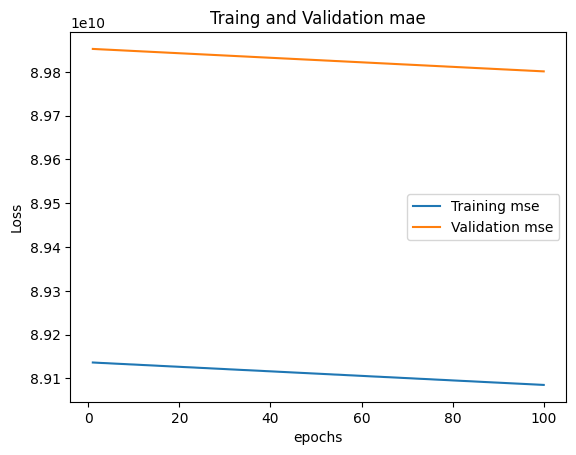

In [52]:
import matplotlib.pyplot as plt

mse_values=history_dict['mse']
val_mse_values=history_dict['val_mse']
epoch=range(1,len(mse_values)+1)

plt.plot(epoch,mse_values,label='Training mse')
plt.plot(epoch,val_mse_values,label="Validation mse")
plt.title("Traing and Validation mae")
plt.xlabel("epochs")
plt.ylabel("Loss")
#plt.ylim(0,100)
plt.legend()
plt.show()

I give up trying to get this to overfit it just won't overfit. It doesn't seem to overfit the performace seems to get better linearly, perhaps we could see overfitting if we ran for a day or so.

In [131]:
!pip install shap

In [132]:
import shap


In [113]:
explainer = shap.KernelExplainer(model, X_train2[:50,:])

In [114]:
shap_values = explainer.shap_values(X_train2[20,:], nsamples=500)

divide by zero encountered in log
invalid value encountered in divide


In [116]:
shap.force_plot(explainer.expected_value, shap_values[0], X_train2[20,:])

TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

In [135]:
!pip install Eli5

In [137]:
perm = PermutationImportance(model, random_state=1, scoring="explained_variance").fit(X_train2, y_train2)

 976/1013 [===========================>..] - ETA: 0s

KeyboardInterrupt: 

In [53]:
#This takes a long time I give up trying to get it to work. I ran it for an hour.

 #use L1, L2 and dropout to try to reduce overfitting, what method seems to work best for you?



l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(lyon_housing_final.shape[1],)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

In [60]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
def build_model_l2():
    modelL2=models.Sequential()
    modelL2.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001),activation="relu",input_shape=(lyon_housing_final.shape[1],)))
    modelL2.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001),activation="relu"))
    modelL2.add(layers.Dense(64,kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    modelL2.add(layers.Dense(10,kernel_regularizer=regularizers.l2(0.001),activation='softmax'))
    modelL2.add(layers.Dense(1))

    modelL2.compile(optimizer='rmsprop',loss='mse',metrics=['mse','mae'])
    return(modelL2)


In [61]:
model2 = build_model_l2()
# Train the model (in silent mode, verbose=0)
num_epochs=100

In [62]:
l2_model_hist = model2.fit(X_train2, y_train2,epochs=num_epochs, batch_size=64, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/100
507/507 [==============================] - 4s 5ms/step - loss: 89136472064.0000 - mse: 89136472064.0000 - mae: 255683.9375 - val_loss: 89852370944.0000 - val_mse: 89852370944.0000 - val_mae: 256052.6406
Epoch 2/100
507/507 [==============================] - 2s 4ms/step - loss: 89135898624.0000 - mse: 89135898624.0000 - mae: 255683.0781 - val_loss: 89851830272.0000 - val_mse: 89851830272.0000 - val_mae: 256051.5781
Epoch 3/100
507/507 [==============================] - 2s 4ms/step - loss: 89135456256.0000 - mse: 89135456256.0000 - mae: 255682.0312 - val_loss: 89851314176.0000 - val_mse: 89851314176.0000 - val_mae: 256050.6406
Epoch 4/100
507/507 [==============================] - 2s 5ms/step - loss: 89134882816.0000 - mse: 89134882816.0000 - mae: 255681.1094 - val_loss: 89850814464.0000 - val_mse: 89850814464.0000 - val_mae: 256049.5938
Epoch 5/100
507/507 [==============================] - 3s 5ms/step - loss: 89134366720.0000 - mse: 89134366720.0000 - mae: 255680.0938 - val

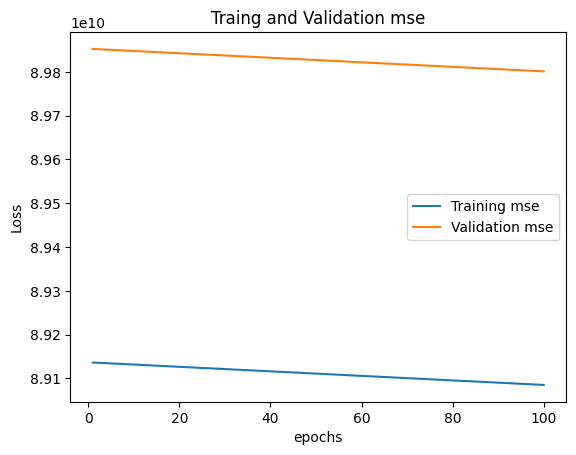

In [64]:
import matplotlib.pyplot as plt

mse_values=history_dict['mse']
val_mse_values=history_dict['val_mse']
epoch=range(1,len(mse_values)+1)

plt.plot(epoch,mse_values,label='Training mse')
plt.plot(epoch,val_mse_values,label="Validation mse")
plt.title("Traing and Validation mse")
plt.xlabel("epochs")
plt.ylabel("Loss")
#plt.ylim(0,100)
plt.legend()
plt.show()

In [163]:
|history_dict2=l2_model_hist.history

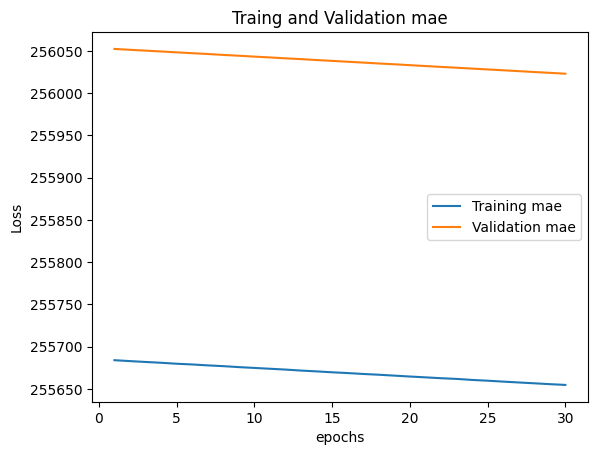

In [164]:
import matplotlib.pyplot as plt

mse_values=history_dict2['mae']
val_mse_values=history_dict2['val_mae']
epoch=range(1,len(mse_values)+1)

plt.plot(epoch,mse_values,label='Training mae')
plt.plot(epoch,val_mse_values,label="Validation mae")
plt.title("Traing and Validation mae")
plt.xlabel("epochs")
plt.ylabel("Loss")
#plt.ylim(0,100)
plt.legend()
plt.show()

In [66]:
#I will have to run this for a long time to do this assignment. But the mse seems to be lower for both traning and validation with l2.

In [67]:
# It also takes a long time to get shap and Eli5 to run on this. I ran it for an hour but something turned off so I give up.